In [55]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load dataset
df=pd.read_csv('TCS1.csv')

In [3]:
#see above five rows of dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [4]:
#no of rows and columns
df.shape

(4494, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03
mean,1146.182768,1158.538059,1132.825428,1145.521462,1049.456965,3.620596e+06
std,994.070086,1003.010607,984.043404,993.346465,992.062558,3.162368e+06
min,112.000000,116.112503,103.837502,111.550003,86.565590,0.000000e+00
25%,290.693748,295.300010,285.931259,290.275009,219.902748,1.942489e+06
50%,977.450012,995.000000,970.250000,981.337524,820.627839,2.804749e+06
75%,1564.774963,1597.287476,1548.662537,1576.781219,1443.631561,4.297410e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502686,8.806715e+07


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [15]:
df.isnull().sum()

Date          0
Open          8
High          8
Low           8
Close         8
Adj Close     8
Volume        8
Open-Close    8
Low-High      8
target        0
dtype: int64

In [16]:
# replacing null values with the mean of the open column
df['Open'] = df['Open'].fillna(df['Open'].mean())

In [17]:
# replacing null values with the mean of the High column
df['High'] = df['High'].fillna(df['High'].mean())

In [18]:
# replacing null values with the mean of the Low column
df['Low'] = df['Low'].fillna(df['Low'].mean())

In [19]:
# replacing null values with the mean of the Close column
df['Close'] = df['Close'].fillna(df['Close'].mean())

In [20]:
# replacing null values with the mean of the AdjClose column
df['Adj Close'] = df['Adj Close'].fillna(df['Adj Close'].mean())

In [21]:
# replacing null values with the mean of the Volume column
df['Volume'] = df['Volume'].fillna(df['Volume'].mean())

In [23]:
df = df.drop(columns=['target'])

In [26]:
df = df.drop(columns=['Open-Close'])

In [27]:
df = df.drop(columns=['Low-High'])

In [28]:
df.to_csv('TCS1.csv', index=False)

In [29]:
df.isnull().sum()
# there is no missing values present in this dataset

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
# cheecking whtether it contains duplicates
df.duplicated().sum()

0

In [37]:
corr_matrix = df.corr()
corr_matrix
# this gives the correlation between the variables

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999893,0.999891,0.999779,0.998755,-0.235007
High,0.999893,1.000000,0.999877,0.999913,0.998893,-0.232812
Low,0.999891,0.999877,1.000000,0.999905,0.998864,-0.236762
Close,0.999779,0.999913,0.999905,1.000000,0.998958,-0.234861
Adj Close,0.998755,0.998893,0.998864,0.998958,1.000000,-0.221112
Volume,-0.235007,-0.232812,-0.236762,-0.234861,-0.221112,1.000000


<AxesSubplot:>

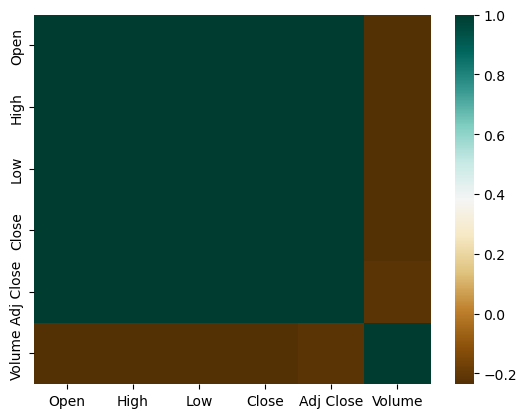

In [40]:
sns.heatmap(corr_matrix,cmap='BrBG')

Text(0.5, 1.0, 'open and Close')

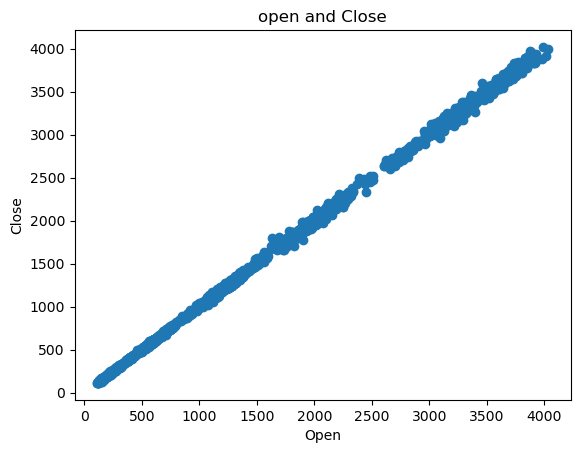

In [36]:
# Scatter Plot Between Open and Close
plt.scatter(df['Open'],df['Close'])
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('open and Close')
# open and close are highly correlated

Text(0.5, 1.0, 'High and Close')

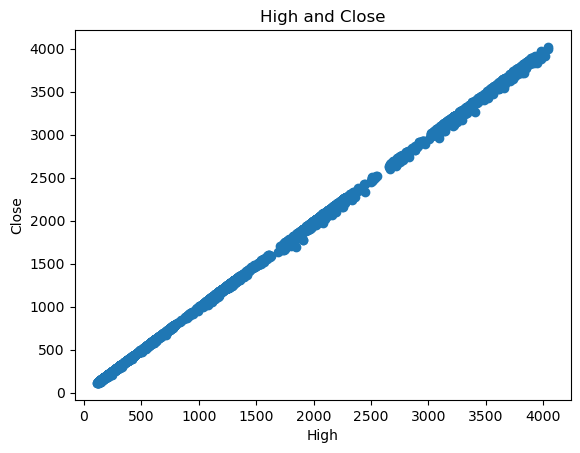

In [41]:
# Scatter Plot Between High and Low
plt.scatter(df['High'],df['Close'])
plt.xlabel('High')
plt.ylabel('Close')
plt.title('High and Close')
# High and close are highly correlated

Text(0.5, 1.0, 'Volume and Close')

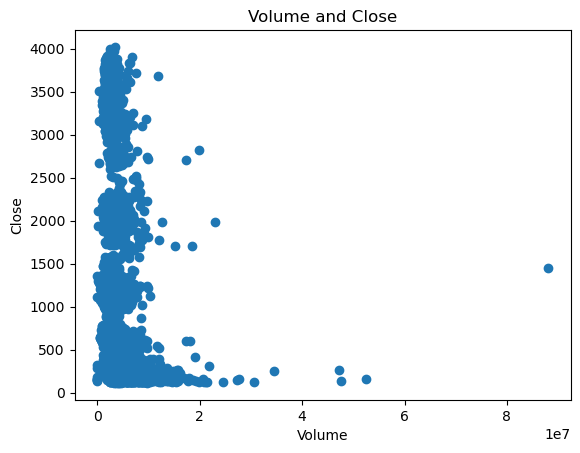

In [42]:
# Scatter Plot Between Volume and Low
plt.scatter(df['Volume'],df['Close'])
plt.xlabel('Volume')
plt.ylabel('Close')
plt.title('Volume and Close')
# Volume and close are not much correlated

model making

In [43]:
df.head(2)
# it returns up to 2 entries

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625,123.345001,90.293549,24465208.0


In [44]:
x = df.iloc[:,[1,2,3,6]]
y = df.iloc[:,[4]]

In [45]:
x
# our input variables

,Open,High,Low,Volume
0,122.800003,122.800003,119.820000,30646000.0
1,121.237503,123.750000,120.625000,24465208.0
2,123.312500,123.750000,122.000000,21194656.0
3,123.750000,124.375000,122.949997,19935544.0
4,123.737503,125.574997,123.250000,21356352.0
...,...,...,...,...
4489,3150.000000,3155.350098,3128.550049,1793722.0
4490,3159.000000,3159.000000,3112.000000,1194289.0
4491,3105.000000,3160.000000,3105.000000,1587601.0
4492,3157.800049,3160.399902,3127.000000,1021913.0


In [46]:
y
# Our target Variable

,Close
0,120.332497
1,123.345001
2,123.512497
3,123.487503
4,124.207497
...,...
4489,3144.699951
4490,3121.850098
4491,3157.300049
4492,3137.399902


In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y)

In [48]:
x_train.shape
# to get the shape of the training data

(3370, 4)

In [49]:
y_train.shape

(3370, 1)

In [50]:
x_test.shape


(1124, 4)

In [51]:
y_test.shape

(1124, 1)

In [53]:
model = RandomForestRegressor()
mymodel = model.fit(x_train,y_train)
# training the model

In [54]:
pred_y = mymodel.predict(x_test)
# testing using testing data

In [56]:
r2_score(pred_y,y_test)
# r2_score is used to check the performance of the model

0.9998590073866475

# Accuracy of our model is 0.9998685435063304